In [1]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from math import sqrt
from prettytable import PrettyTable

In [2]:
data = pd.read_csv("/content/winequality-red.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Data analysis

<Axes: xlabel='quality', ylabel='count'>

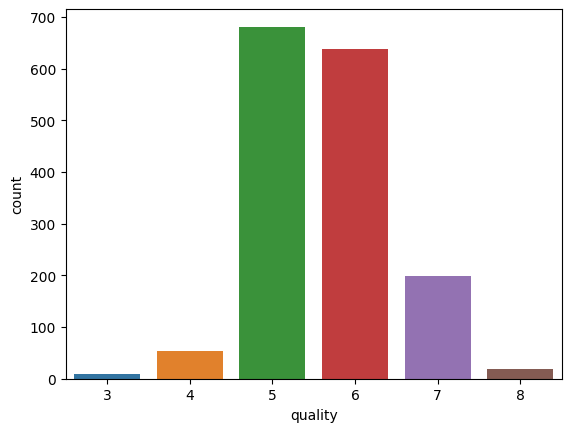

In [3]:
sns.countplot(x = 'quality', data = data)

<Axes: >

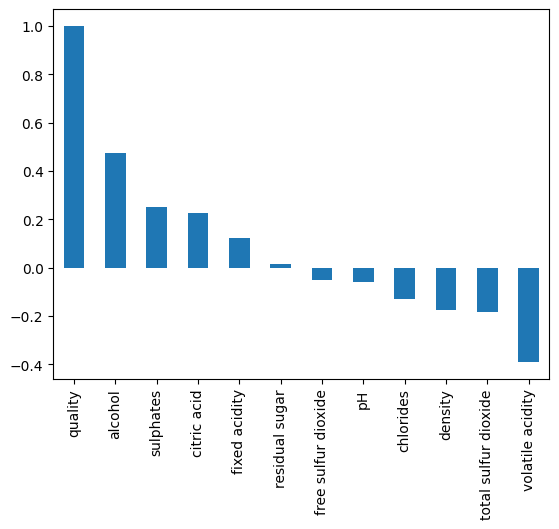

In [4]:
cor = data.corr()['quality']
cor = cor.sort_values(ascending=False)
cor.plot(kind='bar')

<Axes: >

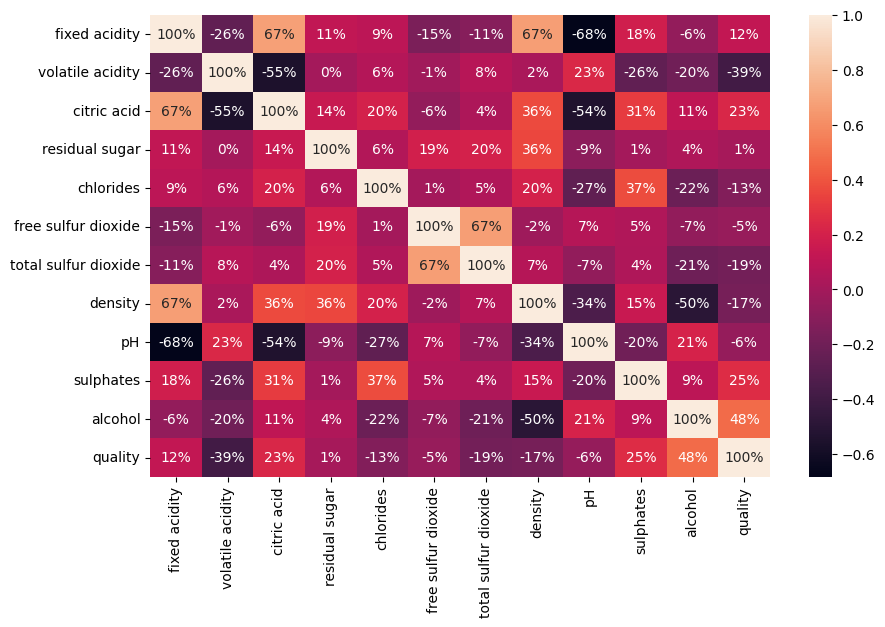

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, fmt='.0%')

In [7]:
print(abs(cor) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric acid              True
fixed acidity           False
residual sugar          False
free sulfur dioxide     False
pH                      False
chlorides               False
density                 False
total sulfur dioxide    False
volatile acidity         True
Name: quality, dtype: bool


[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

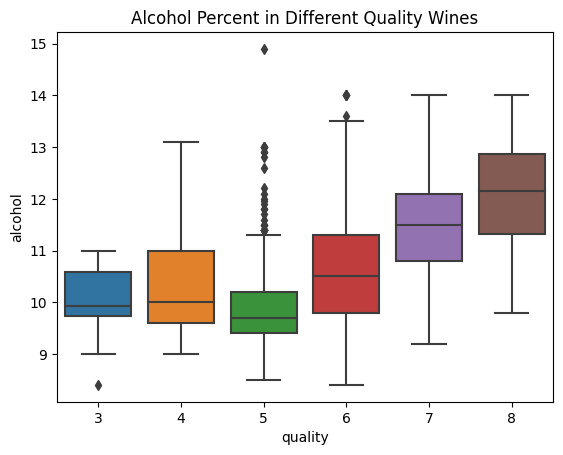

In [9]:
#Choose feature alcohol to analysize
bp = sns.boxplot(x='quality',y='alcohol', data=data)
bp.set(title="Alcohol Percent in Different Quality Wines")

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

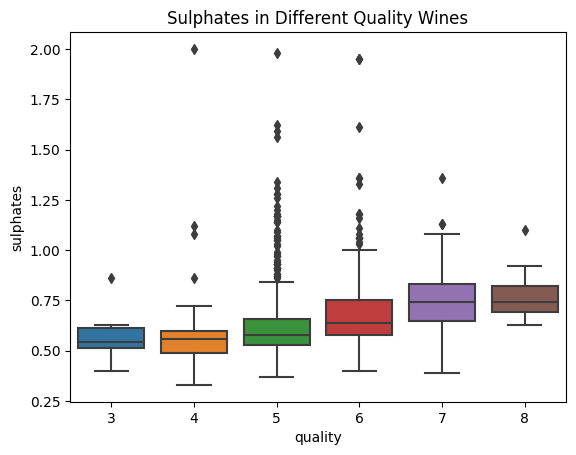

In [11]:
#Choose feature sulphates to analysize
bp = sns.boxplot(x='quality',y='sulphates', data=data)
bp.set(title="Sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

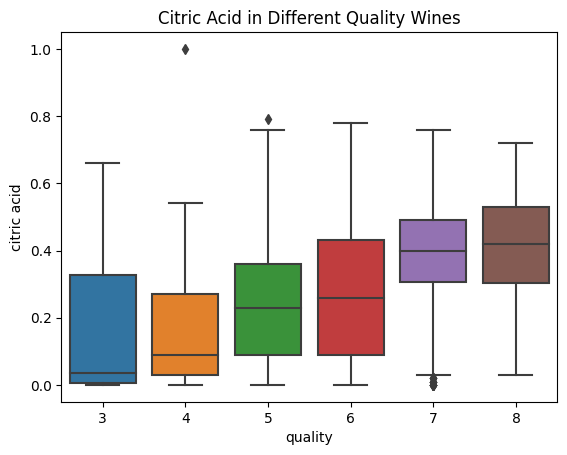

In [14]:
#Choose feature citric acid to analysize
bp = sns.boxplot(x='quality',y='citric acid', data=data)
bp.set(title="Citric Acid in Different Quality Wines")

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

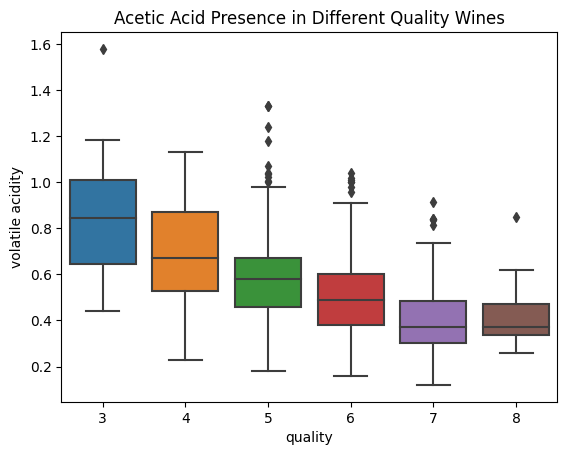

In [15]:
#Choose feature volatile acidity to analysize
bp = sns.boxplot(x='quality',y='volatile acidity', data=data)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

<Axes: xlabel='quality', ylabel='count'>

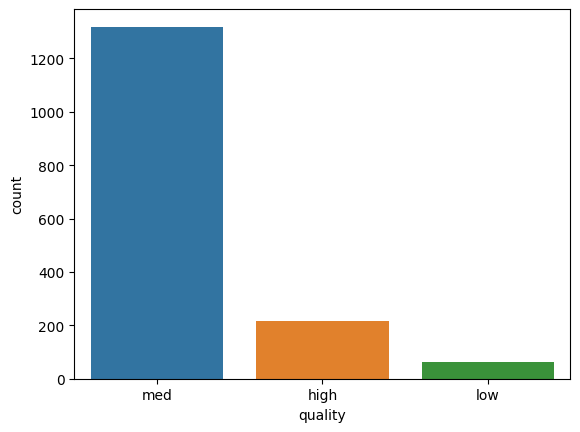

In [21]:
#For further analysis, we group wine into 3 classes:low,mid,high
data_aux = data.copy()
data_aux['quality'].replace([3,4],['low','low'],inplace=True)
data_aux['quality'].replace([5,6],['med','med'],inplace=True)
data_aux['quality'].replace([7,8],['high','high'],inplace=True)
sns.countplot(x = 'quality', data = data_aux)

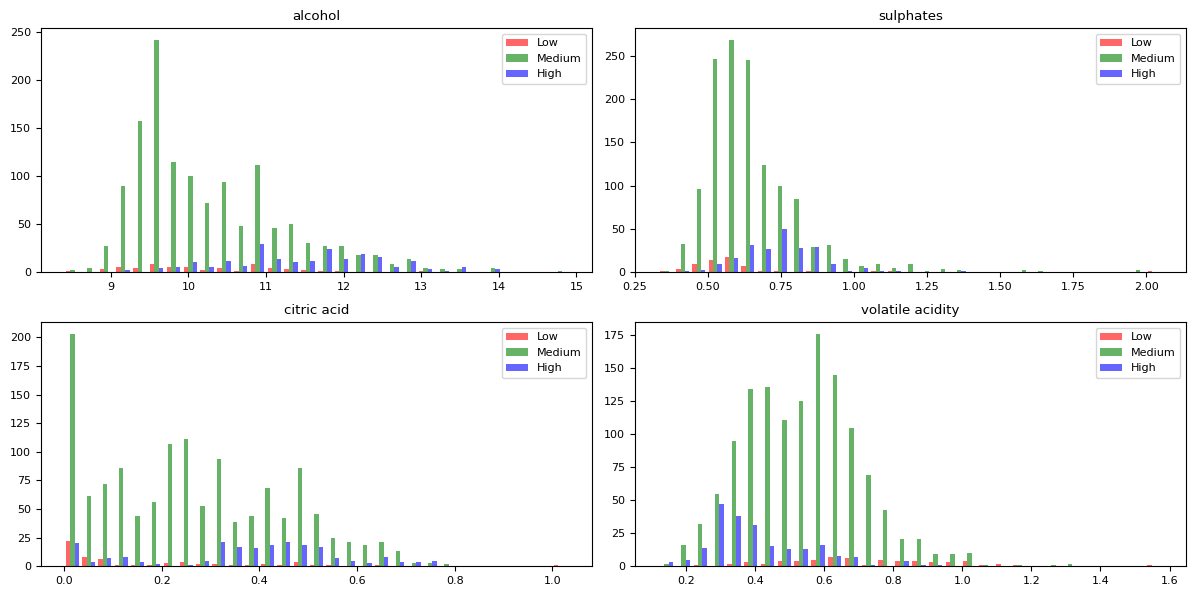

In [24]:
flistt = ['alcohol','sulphates','citric acid','volatile acidity']

low = data_aux[data_aux['quality'] == 'low']
medium = data_aux[data_aux['quality'] == 'med']
high = data_aux[data_aux['quality'] == 'high']

plt.rcParams.update({'font.size': 8})

plot, graphs = plt.subplots(nrows= 2, ncols= 2, figsize=(12,6))
graphs = graphs.flatten()

for i, graph in enumerate(graphs):
    graph.figure

    binwidth= (max(data_aux[flistt[i]]) - min(data_aux[flistt[i]]))/30
    bins = np.arange(min(data_aux[flistt[i]]), max(data_aux[flistt[i]]) + binwidth, binwidth)

    graph.hist([low[flistt[i]],medium[flistt[i]],high[flistt[i]]], bins=bins, alpha=0.6, label=['Low','Medium','High'], color=['red','green','blue'])

    graph.legend(loc='upper right')

    graph.set_title(flistt[i])

plt.tight_layout()

Higher quality wines have higher levels of alcohol, sulfates and citric acid. Lower quality wines have higher levels of volatile acidity

In [25]:
X = data.loc[:,['alcohol','sulphates','citric acid','volatile acidity']]
Y = data.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

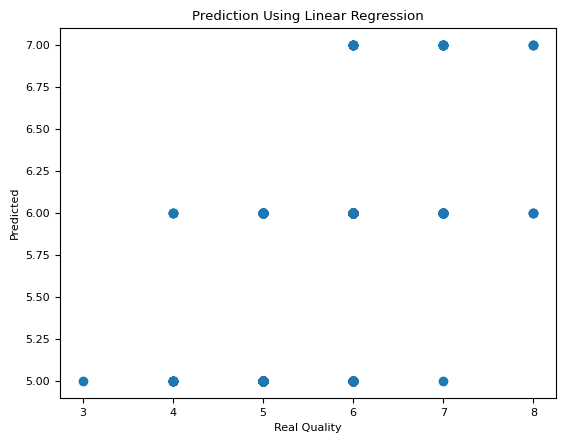

In [30]:
#Model LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction_lr = regressor.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

plt.scatter(y_test,y_prediction_lr)
plt.title("Prediction Using Linear Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

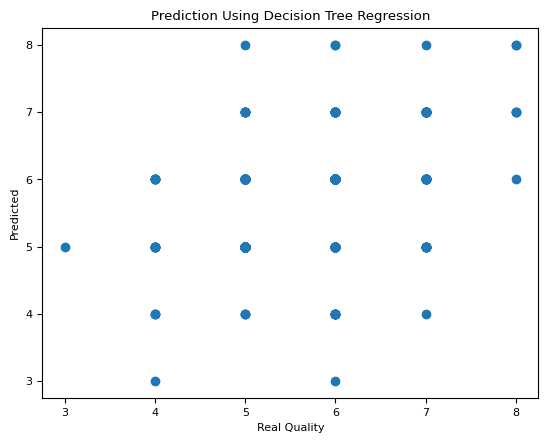

In [28]:
#Model DecisionTree
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_prediction_dt = regressor.predict(X_test)
y_prediction_dt = np.round(y_prediction_dt)


plt.scatter(y_test,y_prediction_dt)
plt.title("Prediction Using Decision Tree Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

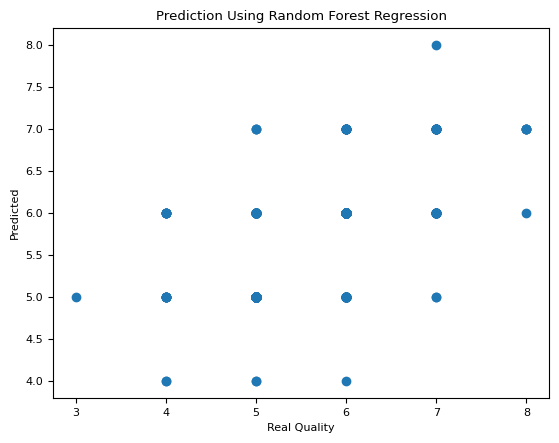

In [27]:
#Model RandomForest
regressor = RandomForestRegressor(n_estimators=10,random_state = 42)
regressor.fit(X_train, y_train)
y_prediction_rf = regressor.predict(X_test)
y_prediction_rf = np.round(y_prediction_rf)

plt.scatter(y_test,y_prediction_rf)
plt.title("Prediction Using Random Forest Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

In [33]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_lr))
print('linear regression rmse is', RMSE)
RMSE = sqrt(mean_squared_error(y_test, y_prediction_dt))
print('Decision tree rmse is', RMSE)
RMSE = sqrt(mean_squared_error(y_test, y_prediction_rf))
print('Random forest rmse is', RMSE)

linear regression rmse is 0.7085783889827104
Decision tree rmse is 0.8403868156985805
Random forest rmse is 0.699702317656111


Model random forest is best